In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skopt import gp_minimize
from skopt.plots import plot_gaussian_process

In [2]:
noise_level = 0.11
def f(x, noise_level=noise_level):
    return np.sin(5*x[0]) * (1 - np.tanh(x[0] ** 2)) + np.random.randn() * noise_level

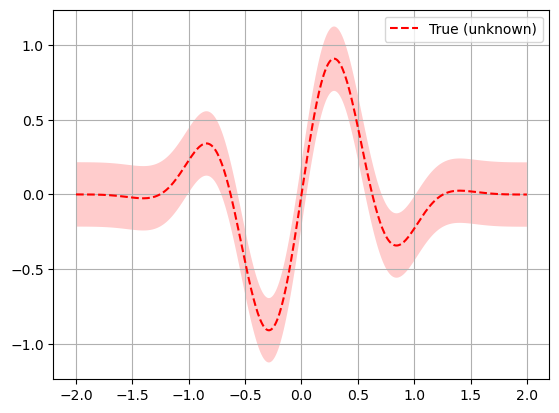

In [3]:
x = np.linspace(-2, 2, 400).reshape(-1, 1)
fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]), np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx], [fx_i + 1.960 * noise_level for fx_i in fx[::-1]])), alpha=0.2, fc="r", ec="None")
plt.legend()
plt.grid()
plt.show()

In [18]:
res = gp_minimize(f,
                  dimensions=[(-2.0, 2.0)],
                  acq_func="EI",
                  n_calls=15,
                  n_random_starts=5,
                  noise=0.01,
                  random_state=1234)

In [19]:
print(f"minimum: at x={res.x}")
print(f"value of the minimum: {res.fun}")

minimum: at x=[-0.2805682622249286]
value of the minimum: -1.032440162165861


In [20]:
print(res)

          fun: -1.032440162165861
            x: [-0.2805682622249286]
    func_vals: [-3.060e-02  1.270e-01 ... -2.645e-02 -3.651e-02]
      x_iters: [[-0.009345334109402526], [1.2713537644662787], [0.4484475787090836], [1.0854396754496047], [1.4426790855107496], [1.0593196270690433], [1.1312843011241602], [-0.2805682622249286], [-0.38735140823440206], [-0.22994296848367313], [-1.9976120164488873], [-0.29874150603871596], [-1.105956039850679], [2.0], [-0.6731098377701228]]
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=0.01),
                                        n_restarts_optimizer=2, noise=0.01, normalize_y=True,
                                        random_state=822569775), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=0.01),
                                        n_restarts_optimizer=2, noise=0.01, normalize_y=True,
                                        random

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

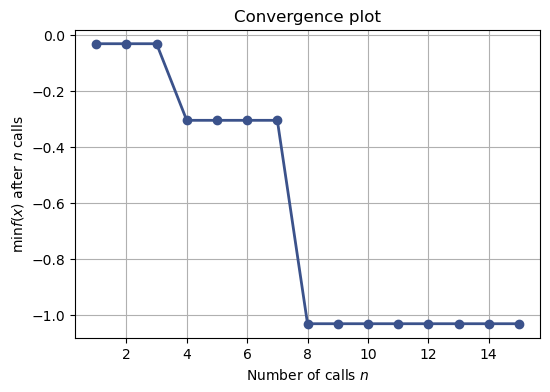

In [21]:
from skopt.plots import plot_convergence
plot_convergence(res)

In [22]:
plt.rcParams["figure.figsize"] = (8, 14)


def f_wo_noise(x):
    return f(x, noise_level=0)

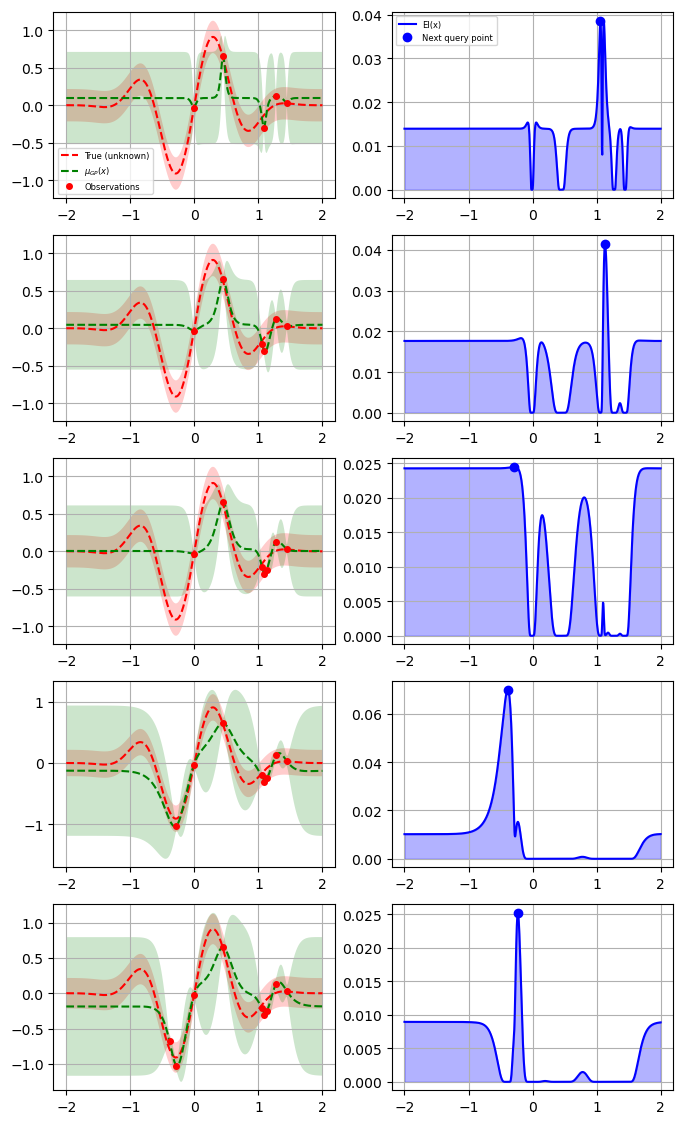

In [23]:
for n_iter in range(5):
    # Plot true function.
    plt.subplot(5, 2, 2*n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(res, n_calls=n_iter,
                               objective=f_wo_noise,
                               noise_level=noise_level,
                               show_legend=show_legend, show_title=False,
                               show_next_point=False, show_acq_func=False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    # Plot EI(x)
    plt.subplot(5, 2, 2*n_iter+2)
    ax = plot_gaussian_process(res, n_calls=n_iter,
                               show_legend=show_legend, show_title=False,
                               show_mu=False, show_acq_func=True,
                               show_observations=False,
                               show_next_point=True)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.show()

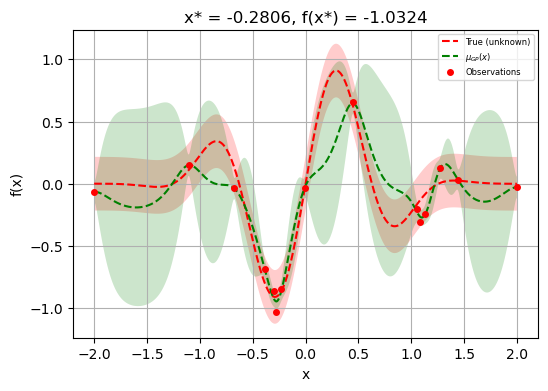

In [24]:
plt.rcParams["figure.figsize"] = (6, 4)

# Plot f(x) + contours
_ = plot_gaussian_process(res, objective=f_wo_noise,
                          noise_level=noise_level)

plt.show()